# Разделительная кластеризация

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
cust_df = pd.read_csv(r'C:\Users\sh_ART\Data\Cust_Segmentation.csv')

In [3]:
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [4]:
df=cust_df.drop("Address",axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [6]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [7]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [8]:
df.dropna(inplace=True)

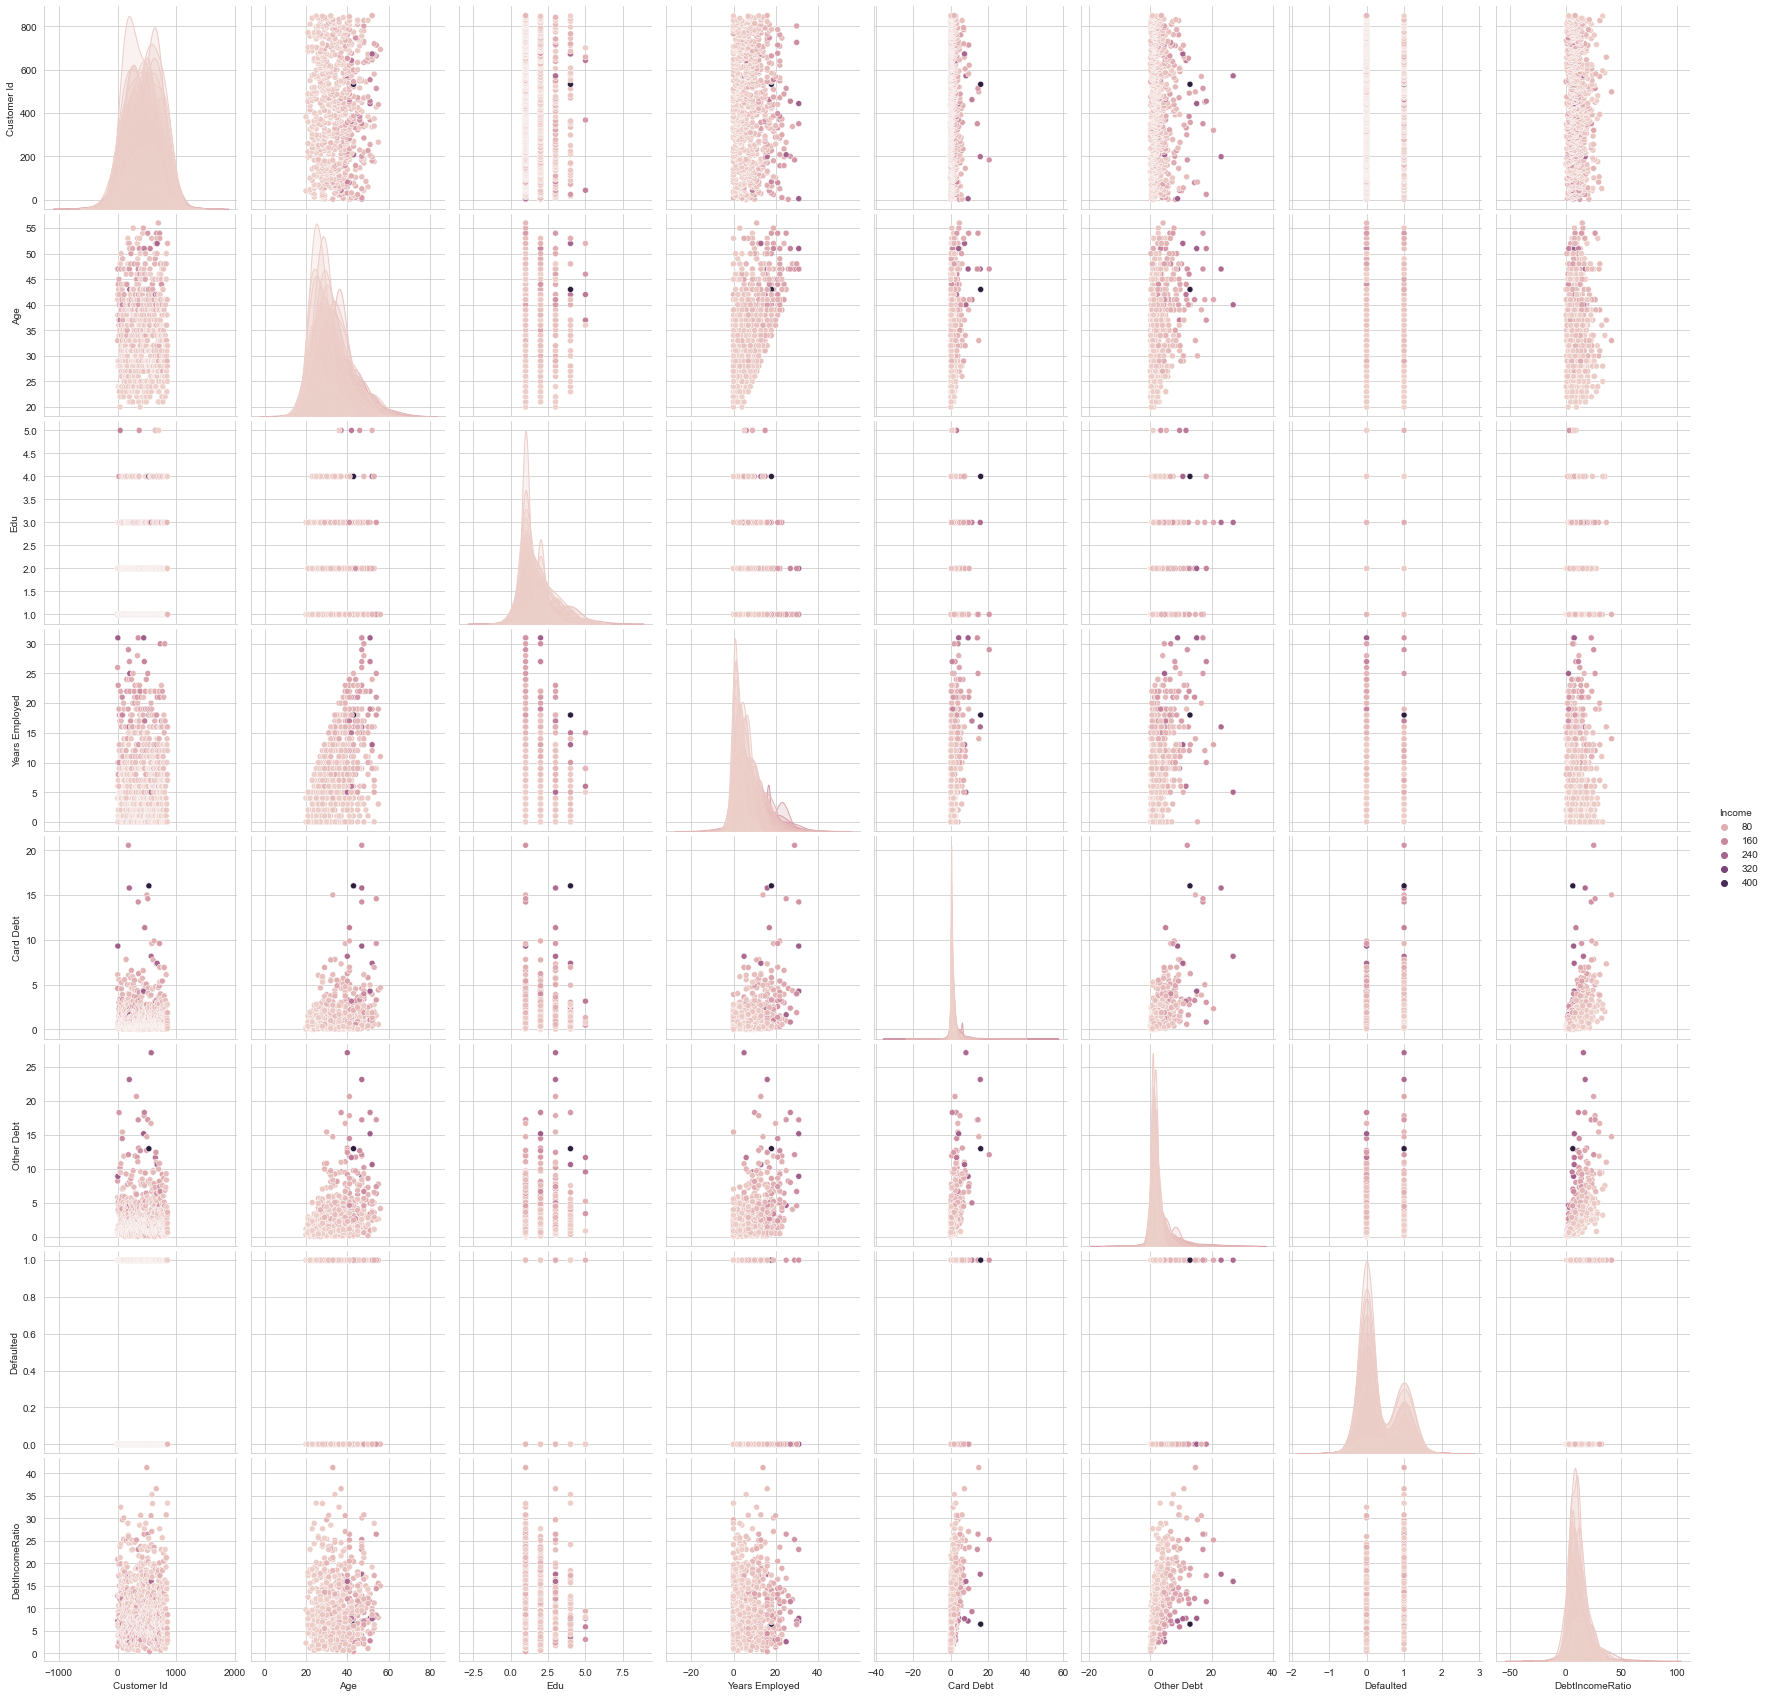

In [9]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Income",size=3);
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
clus_dataset=StandardScaler().fit_transform(X)
clus_dataset

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

<AxesSubplot:>

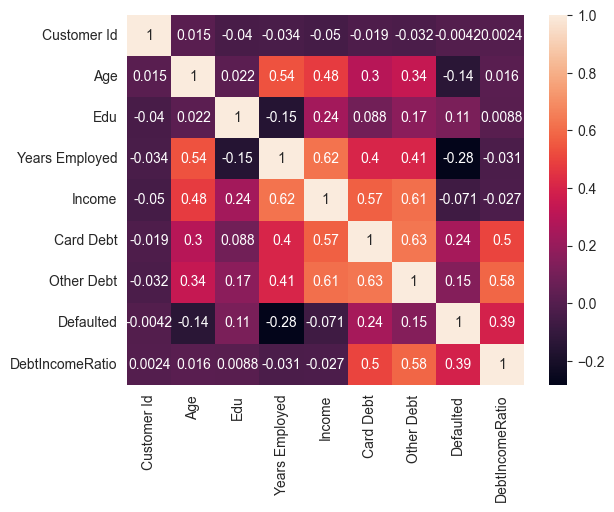

In [11]:
correl=df.corr()
sns.heatmap(correl,annot=True)

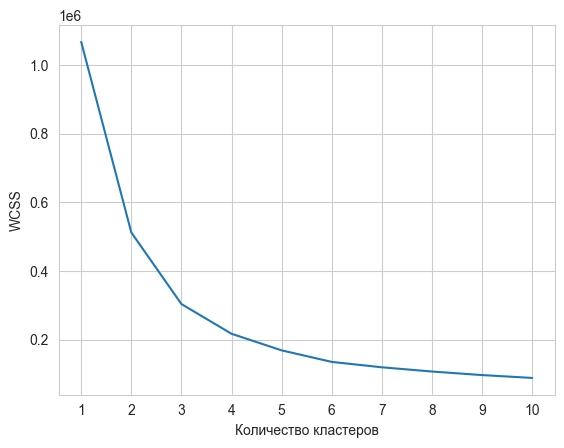

In [12]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=69)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS")
plt.show()

In [13]:
cluster_num=3
K_means = KMeans(n_clusters = 3,
                 max_iter = 300,
                random_state = 1)
y_kmeans = K_means.fit_predict(X)

In [14]:
y_kmeans

array([0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [15]:
df["clus_km"]=y_kmeans
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [16]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
...,...,...,...,...,...,...,...,...,...,...
844,845,41,1,7,43,0.694,1.198,0.0,4.4,0
846,847,28,2,7,34,0.359,2.021,0.0,7.0,0
847,848,25,4,0,18,2.802,3.210,1.0,33.4,0
848,849,32,1,12,28,0.116,0.696,0.0,2.9,0


In [17]:
df.groupby("clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387
2,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286


Text(0, 0.5, 'Income')

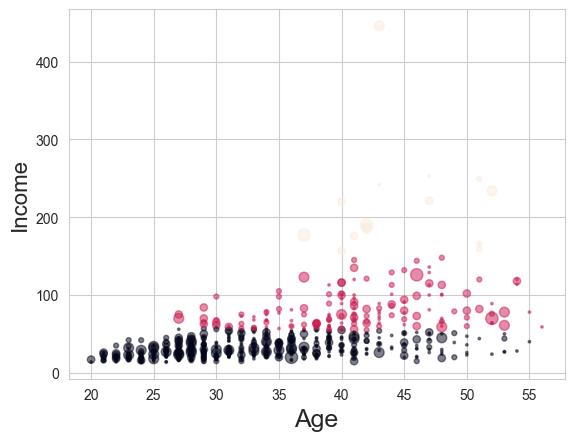

In [18]:
area= np.pi * (X[:,1])**2
plt.scatter(X[:, 0], X[:,3], s=area, c=y_kmeans.astype(np.float), alpha = 0.5)
plt.xlabel("Age",fontsize=18)
plt.ylabel("Income",fontsize=16)

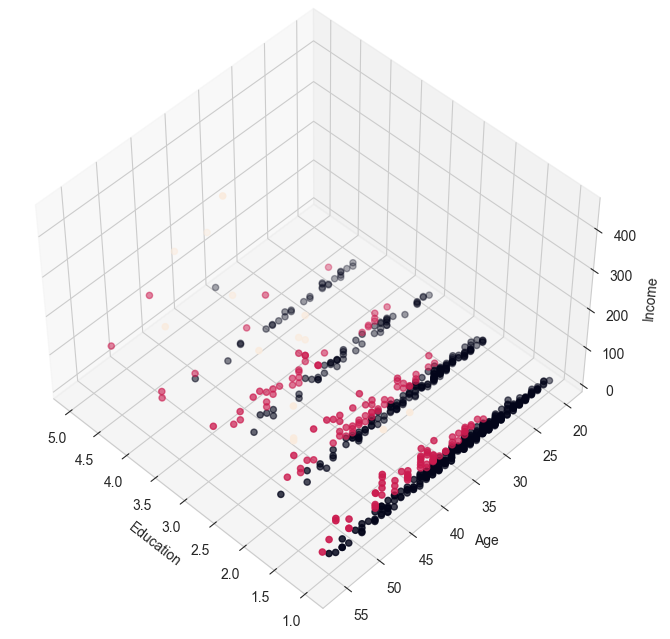

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0,.95,1], elev=48, azim=134)

ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")

ax.scatter(X[:, 1],X[:, 0],X[:, 3], c= y_kmeans.astype(np.float))

2. Внесите шум в набор данных (случайным образом изменить определенную долю объектов набора: 1%, 3%, 5%, 10%; изменение может заключаться в добавлении/вычитании к/из одной/нескольких координат объекта случайного числа). Выполните кластеризацию зашумленного набора данных с помощью алгоритмов k‑Means и k‑Medoids (или PAM), используя различные значения параметра  (из интервала 3..9). Выполните визуализацию полученных результатов в виде точечных графиков, на которых цвет точки отражает принадлежность кластеру.

In [20]:
cust_df = pd.read_csv(r'C:\Users\sh_ART\Data\Cust_Segmentation.csv')

In [21]:
change = cust_df.sample(50).index
change

Int64Index([314, 543, 507, 576, 631, 282,  73, 220, 114, 785, 366, 575, 809,
            828, 589, 323, 598, 293, 478, 337, 641, 536, 458, 591, 697, 711,
            663, 421,  81, 693, 221, 748, 747, 658, 270, 365, 571, 719, 306,
            813, 388, 652, 297, 172,  51, 232, 325, 516,  92, 718],
           dtype='int64')

In [22]:
cust_df.loc[change,"Income"]=cust_df.loc[change,"Income"]*5

In [23]:
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [24]:
cust_df.dropna(inplace=True)

In [25]:
df=cust_df.drop("Address",axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


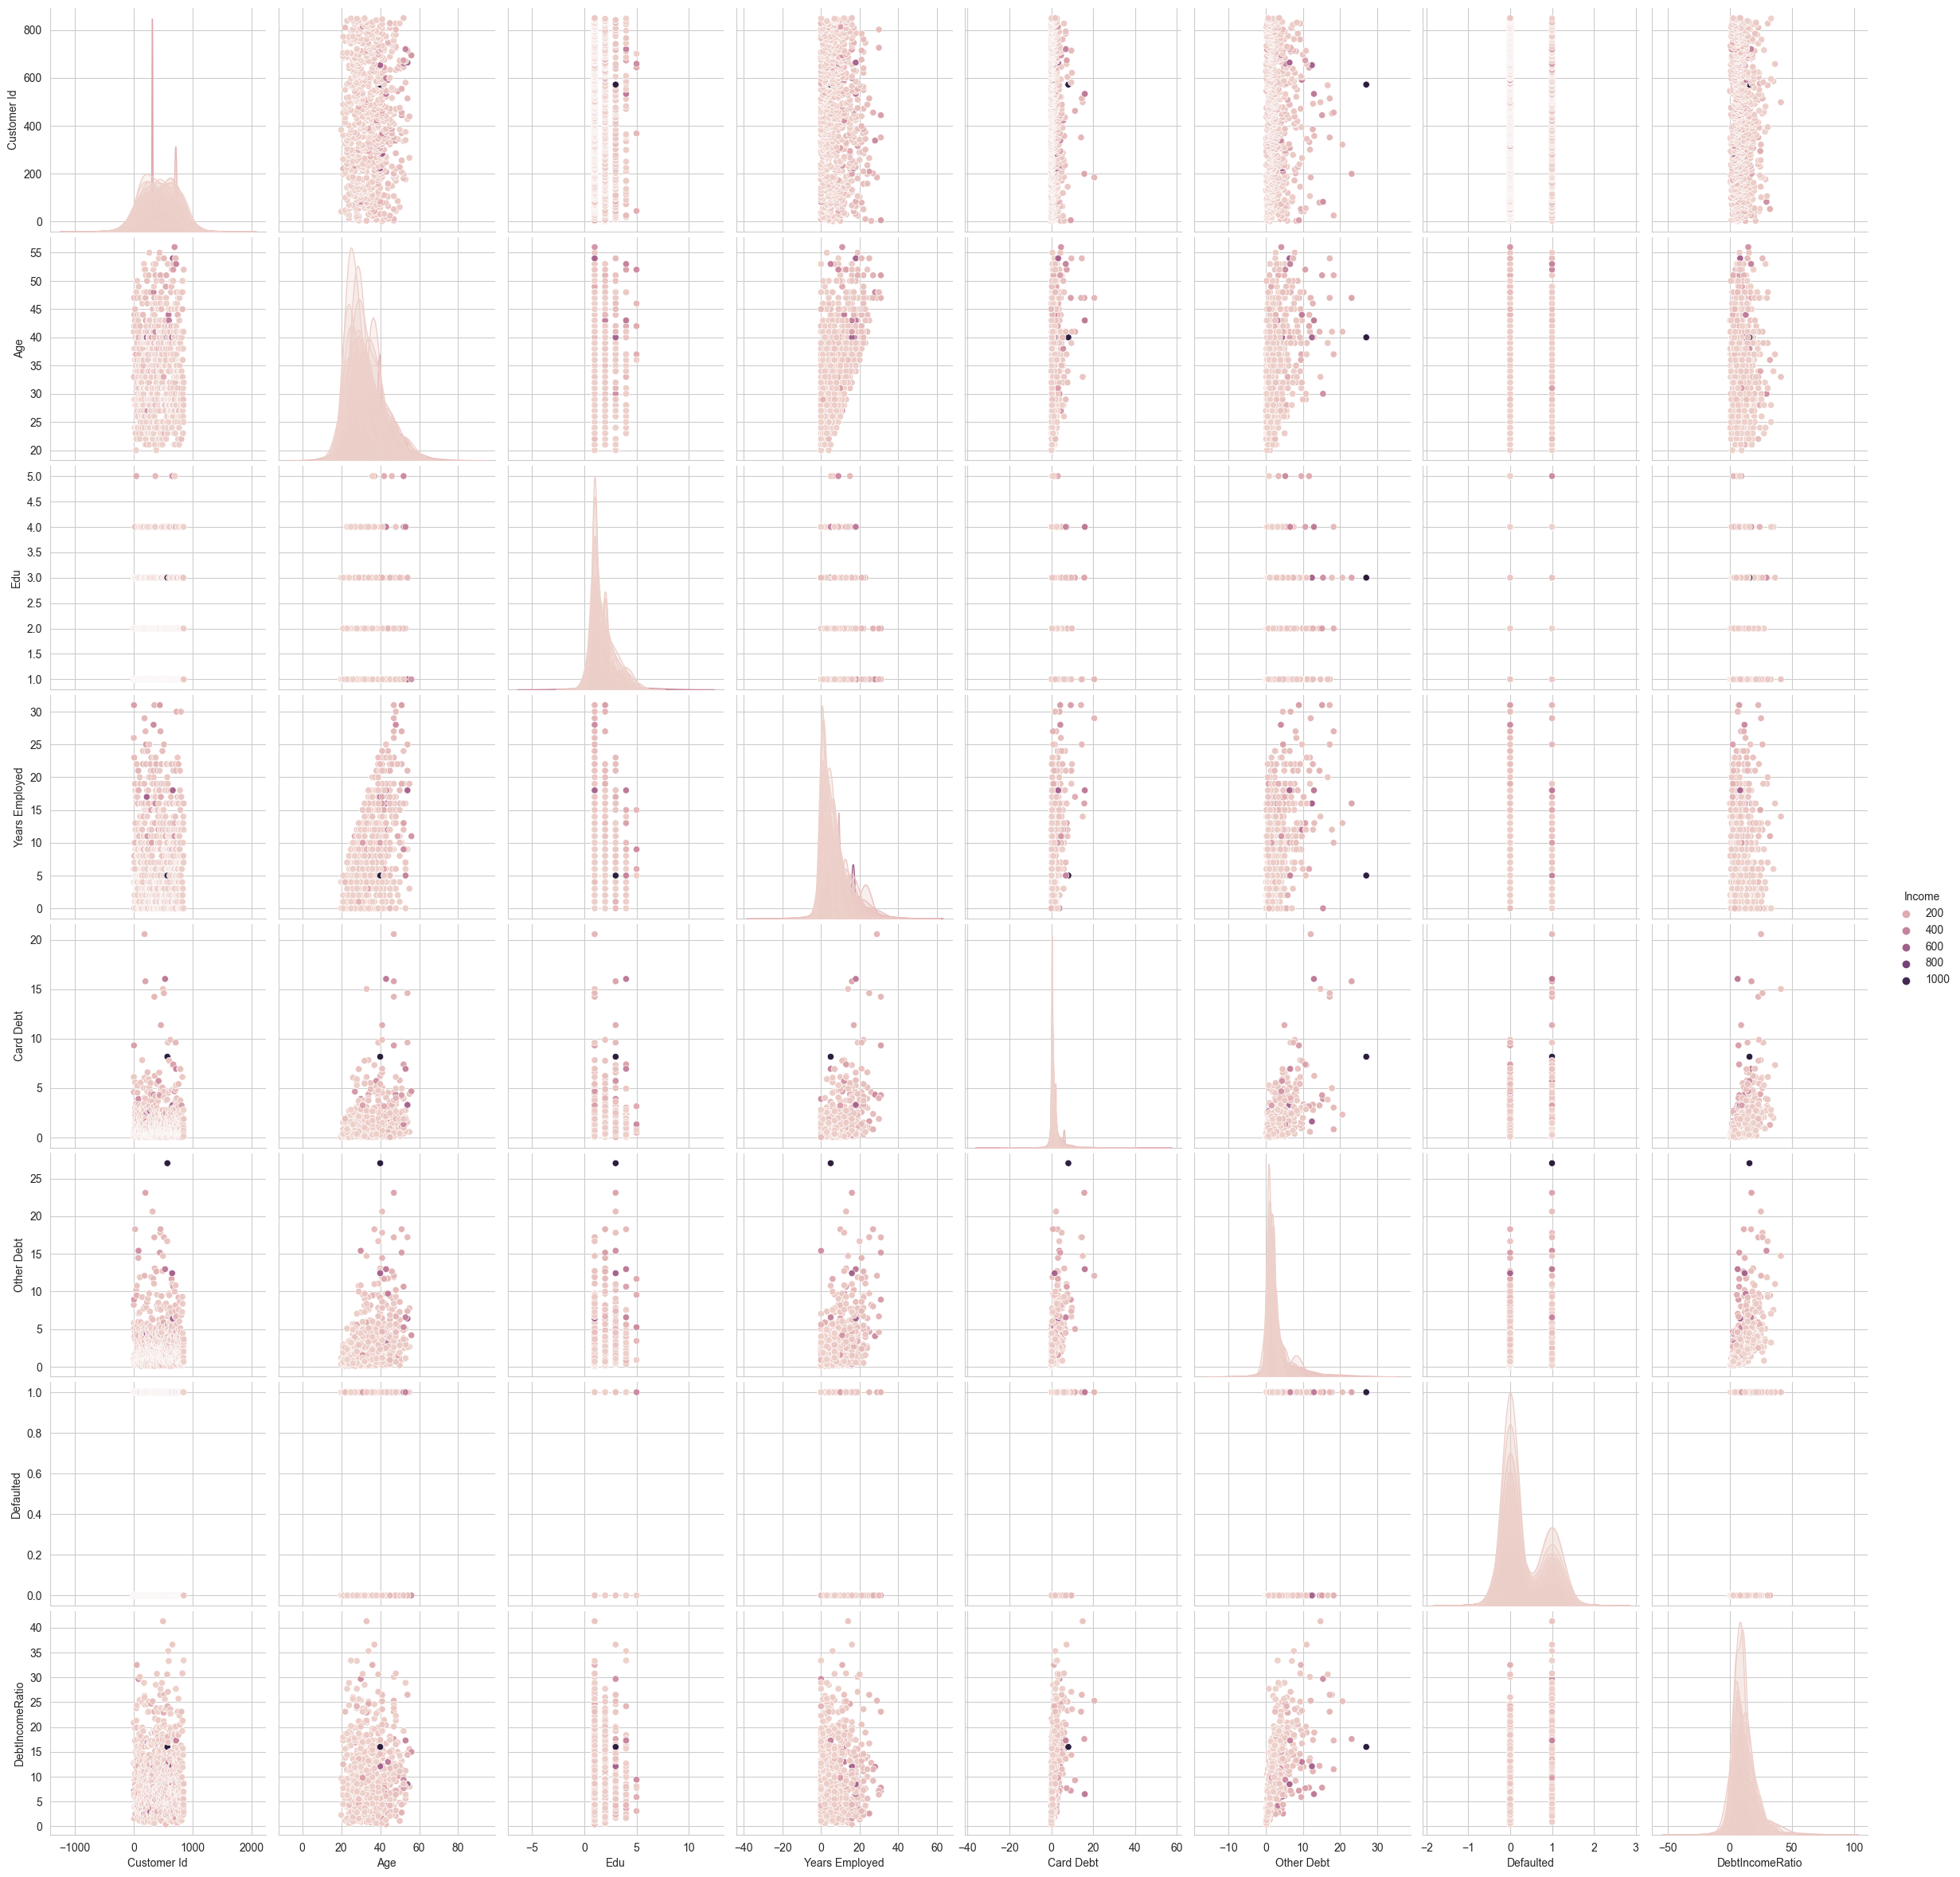

In [26]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Income",size=3);
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
clus_dataset=StandardScaler().fit_transform(X)
clus_dataset

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

In [28]:
kmeans = KMeans(n_clusters = 3,
                max_iter = 300, 
                random_state = 69)

y_kmeans = kmeans.fit_predict(X)

Text(0, 0.5, 'Income')

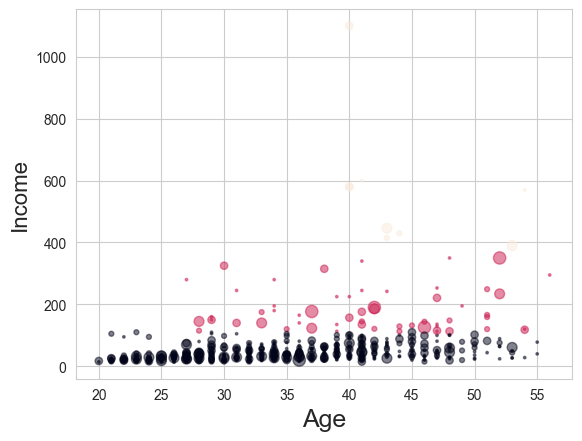

In [29]:
area= np.pi * (X[:,1])**2
plt.scatter(X[:, 0], X[:,3], s=area, c=y_kmeans.astype(np.float), alpha = 0.5)
plt.xlabel("Age",fontsize=18)
plt.ylabel("Income",fontsize=16)

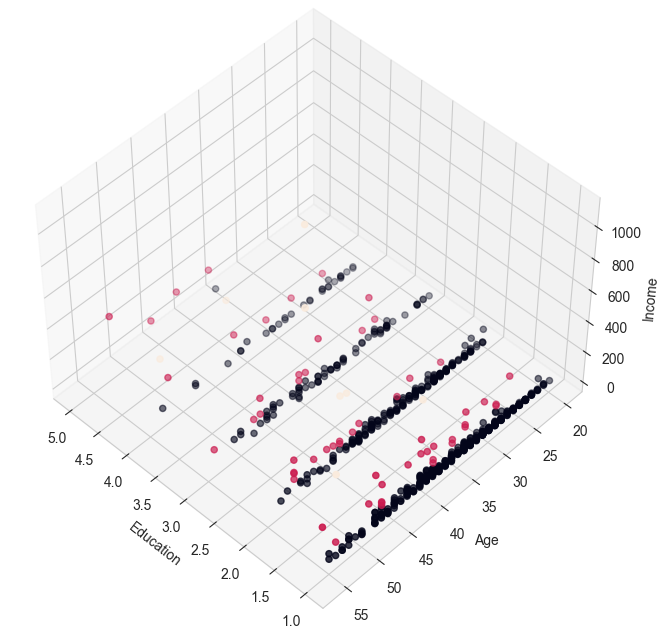

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0,.95,1], elev=48, azim=134)

ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")

ax.scatter(X[:, 1],X[:, 0],X[:, 3], c= y_kmeans.astype(np.float))

In [31]:
!pip install scikit-learn-extra



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## KMedoids

In [32]:
from sklearn_extra.cluster import KMedoids

In [33]:
k_med = KMedoids(n_clusters=3).fit(X)
labels = k_med.labels_

In [34]:
labels

array([2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 1,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 1, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0,
       2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1,
       2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 2,

Text(0, 0.5, 'Income')

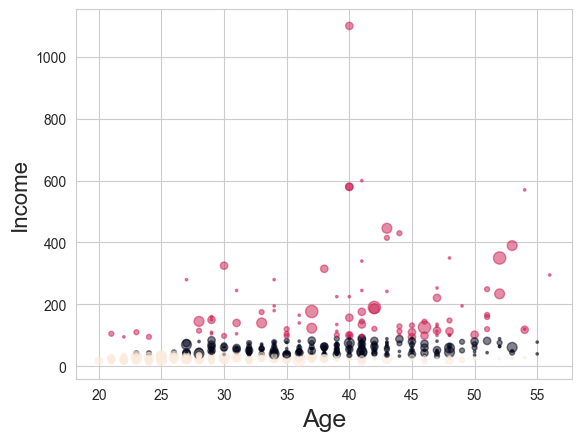

In [35]:
area= np.pi * (X[:,1])**2
plt.scatter(X[:, 0], X[:,3], s=area, c=labels.astype(np.float), alpha = 0.5)
plt.xlabel("Age",fontsize=18)
plt.ylabel("Income",fontsize=16)

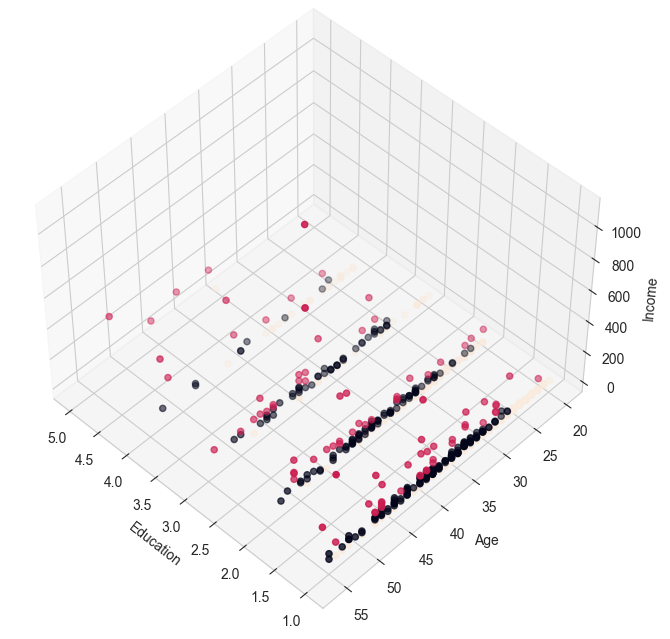

In [36]:
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0,.95,1], elev=48, azim=134)

ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")

ax.scatter(X[:, 1],X[:, 0],X[:, 3], c= labels.astype(np.float))